[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zhimingkuang/Harvard-AM-115/blob/main/13_traffic/simple_car_congestion.ipynb)

### What happens to a perturbation to car density (_e.g._ congestion)?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as IP

In [2]:
# Customize for matplotlib
# If interested in the matplotlib object hierarchy, check: https://realpython.com/python-matplotlib-guide/
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['mathtext.default'] = 'regular'
# Change font size: http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 20

In [3]:
N = 50 # number of cars
Tmax = 60 # time of integration
dt = 0.1 # timestep 
t = np.linspace(0, Tmax, np.int32(Tmax/dt) + 1) # time discretization 
n_steps = np.size(t)

# Note the direction congestion propagates when we change the initial car density
# rho0 = 0.2 # initial car density is low
rho0 = 0.8 # initial car density is high
amp = 0.1 # a smaller perturbation--> linear wave
# amp = 0.5  # a large perturbation--> nonlinear wave

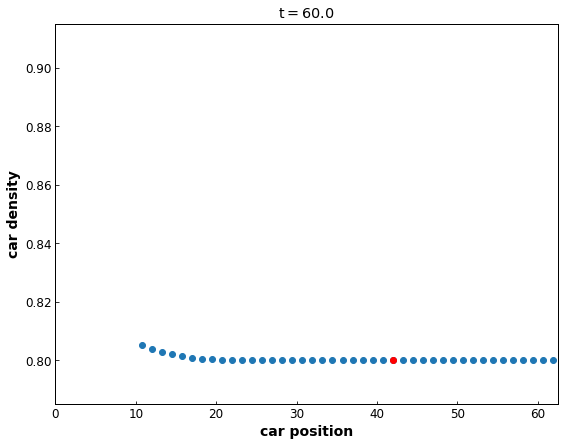

In [4]:
# Initialize arrays 
rho = np.zeros((N, n_steps), dtype=np.float32())
x = np.array(rho)

rho[:,0] = rho0 + amp * np.exp(-((np.array(range(N)) - 0.5*N)/5.)**2)  # add the perturbation to rho
rho[np.argwhere(rho[:,0]>1)[:,0], 0] = 1.

# Initial car position
x[0,0] = 0.
for i in range(N-1):
    x[i+1,0] = x[i,0] + 1./rho[i,0] # inter-car spacing is the inverse of car density
    
# Forward Euler integration
for it in range(n_steps-1):
    u = 1. - rho[:,it]  # speed is given by 1-density
    
    x[-1,it+1] = x[-1,it] + u[-1]*dt # leading car
    rho[-1, it+1] = rho[-1, it] # leading car doesn't change its car density
    
    for i in range(N-2, -1, -1):
        x[i,it+1] = x[i,it] + u[i]*dt # update car position based on car speed
        rho[i,it+1] = 1./(x[i+1,it+1] - x[i,it+1]) # update car density based on car positions
        # density(i) is 1/spacing from i to i+1
        
fig, ax = plt.subplots(1,1,figsize=(9,7))

for it in range(n_steps):
    ax.cla()
    
    ax.plot(x[:,it], rho[:,it],'o')
    ax.plot(x[np.int32(0.5*N),it], rho[np.int32(0.5*N), it], 'ro')
    ax.set(xlabel='car position', ylabel='car density')
    ax.set_xlim(0., N/rho0)
    ax.set_ylim(min(rho[:,0])-0.015, max(rho[:,0])+0.015)
    ax.set_title(r'$t = %.1f$' % (it*dt))
    IP.display(fig)
    
    IP.clear_output(wait = True)
    plt.pause(0.01)

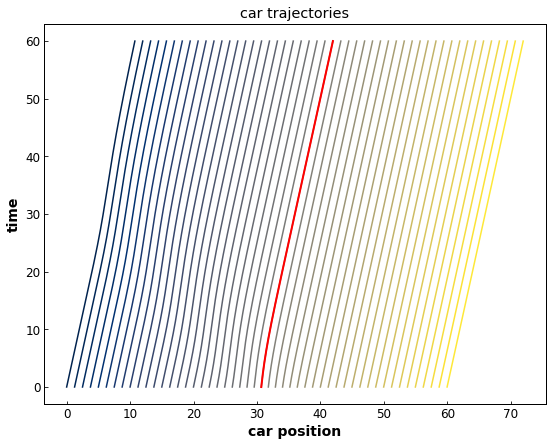

In [5]:
fig, ax = plt.subplots(1,1,figsize=(9,7))

# Create a color gradient for plotting all solutions
# Check out more colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html
colors = plt.cm.cividis(np.linspace(0.,1.,N))

for i in range(N): 
    ax.plot(x[i,:], t, color=colors[i])
ax.plot(x[np.int32(0.5*N),:], t, color='r', linewidth=2.0)

ax.set_xlabel('car position')
ax.set_ylabel('time')
ax.set_title('car trajectories')

plt.show()